# Отладка программного кода


До сих пор мы сталкивались с ошибками, когда что-то делали неправильно. Например, когда мы пытались изменить символ в строке, мы получили `TypeError`.

In [1]:
my_str = 'AGCTATC'
my_str[3] = 'G'

TypeError: 'str' object does not support item assignment

В этом случае значок `TypeError`  означает, что мы пытались сделать что-то, что разрешено в Python для некоторых типов, но мы пытались сделать это для типа, для которого это недопустимо (строки неизменяемы). 

В Python ошибка, обнаруженная во время выполнения, называется `исключением`. Мы говорим, что интерпретатор «вызвал исключение». Существует множество видов встроенных исключений, и вы можете найти их список с описанием [здесь](https://docs.python.org/3/library/exceptions.html#bltin-exceptions). 

### Виды ошибок

В компьютерных программах мы можем разбить ошибки на три типа.

#### Синтаксические ошибки

Ошибка синтаксиса означает , что вы написали какую-то бессмыслицу, что-то, что интерпретатор Python не может понять. Синтаксическая ошибка в Python будет такой: 

my_list = [1, 2, 3

Мы знаем, что это значит. Мы пытаемся создать список с тремя пунктами, 1, 2, и 3. Однако мы забыли закрывающую скобку. В отличие от пользователей, интерпретатор Python не прощает ошибок; это вызовет исключение SyntaxError.

In [3]:
my_list = [1, 2, 3

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_9576/1821067514.py, line 1)

С синтаксическими ошибками часто легче всего справиться, поскольку программа вообще не запускается, если таковые имеются.

#### Ошибки времени выполнения

Ошибки времени выполнения возникают, когда программа синтаксически правильна, поэтому она может работать, но интерпретатор обнаружил что-то неправильное. 

Пример в начале, пытающийся изменить символ в строке, является примером ошибки времени выполнения. Это была конкретная ошибка времени выполнения TypeError. У Python есть символ RuntimeError, который просто указывает на общую ошибку времени выполнения (не синтаксическую).

Ошибки времени выполнения обнаружить труднее, чем ошибки синтаксиса, потому что вполне возможно, что программа может выполняться на всем пути, не обнаружив ошибки для некоторых входных данных, но для других входных данных вы получите ошибку. Давайте рассмотрим пример простой функции, предназначенной для сложения двух чисел.

In [4]:
def add_two_things(a, b):
    """Add two numbers."""
    return a + b

Синтаксически с этой функцией все в порядке. Мы можем его использовать, и он работает.

In [5]:
add_two_things(6, 7)

13

Мы даже можем складывать строки, даже если это предназначалось для сложения двух чисел.

In [6]:
add_two_things('Hello, ', 'world.')

'Hello, world.'

Однако, когда мы пытаемся добавить строку и число, мы получаем ошибку времени выполнения TypeError, которую мы видели раньше.

In [7]:
add_two_things('a string', 5.7)

TypeError: can only concatenate str (not "float") to str

#### Семантические ошибки

Семантические ошибки, пожалуй, самые гнусные. Они возникают, когда ваша программа синтаксически правильна, выполняется без ошибок времени выполнения, а затем дает неправильный результат. 

Эти ошибки труднее всего найти, и они могут нанести наибольший ущерб. В конце концов, когда ваша программа не делает то, для чего вы ее спроектировали, нужно чтобы она выдала исключение!

Ниже приводится типичный пример семантической ошибки, при которой мы изменяем изменяемый объект в функции, а затем пытаемся использовать его повторно.

In [8]:
# A function to append a list onto itself, with the intention of
# returning a new list, but leaving the input unaltered
def double_list(in_list):
    """Append a list to itself."""
    in_list += in_list
    return in_list

# Make a list
my_list = [3, 2, 1]

# Double it
my_list_double = double_list(my_list)

# Later on in our program, we want a sorted my_list
my_list.sort()

# Let's look at my_list:
print('We expect [1, 2, 3]')
print('We get   ', my_list)

We expect [1, 2, 3]
We get    [1, 1, 2, 2, 3, 3]


Ой! Мы my_list непреднамеренно изменили функцию. Вопрос: Как бы вы переписали double_list (), чтобы избежать этой проблемы?

## Понятие отладки

Процесс разработки всегда сопровождается проверкой правильности работы программы. Однако иногда непонятно в какой из строк произошла ошибка, если это не синтаксическая (интерпретатор сам указывает строку, где произошла ошибка). Поэтому на помощь приходит отладка. **Отладка** - это процесс нахождения и устранения ошибок.

## Обратите внимание, что программу можно проверить двумя способами:
> 1. обычный запуск программы — программа от начала до конца обрабатывается интерпретатором автоматически, останавливаясь только в случае возникновения ошибки или в необходимости ввода пользовательских данных;

> 2. режим построчной отладки — отладка происходит по строкам, т.е. интерпретатор останавливается в точках останова или на каждом шаге и позволяет увидеть изменения той или иной переменной в течение выполнения отладки. В свою очередь отладка делится еще на три типа режима отладки:

>> a. шаг с обходом  — данный режим отладки производит обычную построчную обработку строк с командами, при этом не обязательно проставлять для каждой строки точки останова;

>> b. шаг с заходом — данный режим отладки необходим в случае работы с функциями, когда необходимо проследить за тем, что происходит внутри функции построчно, при этом внутри функции не обязательно проставлять точки останова;

>> c. шаг с выходом — данный режим отладки производит выход из функции, то есть при передаче управления функции не происходит построчное выполнение команд внутри этой функции, а происходит ее выход.

## В данном курсе два режима отладки будут рассмотрены в среде VS Code

Данная IDE является продуктом компании Microsoft и имеет ряд преимуществ. В частности, это быстрая и бесплатная среда разработки, которая поддерживает программирование на ряде языков, при этом не требуется устанавливать стороние расширения, так как все уже встроено в IDE.


## Сообщение об ошибке подсказывает как и где искать ошибку

Вывод сообщения об ошибке делится на две части: непосредственно сообщение об ошибке и трейсбэк (traceback). **Traceback** — это список различных вызовов функции, происходящий снизу вверх вплоть до первых строчек или до того места, где произошла ошибка. 

Дан следующий пример:

In [9]:
for num in 'hello':
    print(int(num))

ValueError: invalid literal for int() with base 10: 'h'

При запуске данного программного блока в редакторе VS Code будет выведена информация об ошибке.
Ниже представлен traceback (сообщение об ошибке). Разберем данное сообщение на составные части, чтобы понимать, где и какая ошибка произошла в программе:


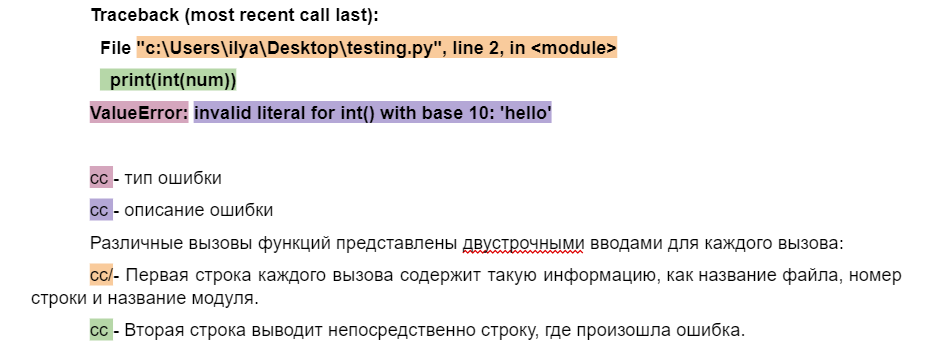

## Точка останова показывает на конкретном шаге значение той или иной переменной

Для решения некоторых ошибок, а чаще всего логических, может понадобиться построчная проверка кода. Для того, чтобы проверить пошагово код в каком-либо редакторе существуют точки останова. **Точки останова (breakpoint)** – специальные метки, позволяющие пройти программу пошагово и контролировать изменения переменных на каждом шаге.

Чтобы сделать проверку и проверить каждую строку кода легче открыть специализированную среду. Процесс отладки мы будем рассматривать в среде Visual Studio Code, так как она легкая и быстрая, нетребующая каких-либо специализированных сторонних программ и расширений (расширения находятся внутри среды), и хорошо подходит для работы с кодами. 

Давайте на каждом шаге проверим значение переменной **fact**

In [10]:
number = int(input())
fact = 1

for i in range(1, number + 1):
  fact *= i
print(fact)

120


На практике наиболее востребованной задачей является сортировка элементов. Расммотрим пример сортировки элементов списка на каждом шаге:

In [ ]:
list = [0, -3, 10, -1, 3, -10, 2, 5]
for j in range(0, len(list)-1):
    for i in range(0, len(list)-1-j):
        check = list[i]
        if check > list[i + 1]:
            check = list[i + 1]
            list[i + 1] = list[i]
            list[i] = check
print(list)

[0, 2, -1, 3, 0, 3, 5, 10]


Данный пример демонстрирует сортировку элементов списка по возрастанию с помощью метода пузырька. Скопируйте данную программу в среду VS Code и проследите на каждой итерации цикла значение списка **list**.

## Задания на занятие
## Задание 1

Ответьте на следующий вопрос: какие типы исключений существуют и какие ошибки называются синтаксическими, а какие исключениями? В чем между ними разница?

## Задание 2

Рассмотрите следующую программу и разберите сообщение об ошибке, а также ответьте на вопрос по какой причине произошла ошибка?

In [ ]:
for i in range(0, num):
  print(i ** 2)

## Задание 3

Дан некоторый программный блок. Вам необходимо путем отладки в среде VS Code проставить точки останова и вывести на каждом этапе значение переменной **result**:

In [ ]:
string_exmpl = 'Corporation'
str_vowel = 'aeiouy'
result = ''
for i in range(0, len(string_exmpl), 2):
    if string_exmpl[i] in str_vowel:
        result = result + string_exmpl[i] * 2
print(result)

ooaaii


## Задание 4

В даном коде допущена логическая ошибка. Путем отладки найдите и исправьте ее. Данная программа расчитывает сколько получит вкладчик через **n**-ое количество лет денежных средств, если первоначальная сумма вклада равна **P**, а процентная ставка **i** равна 1.0 % годовых. Если вкладчик хранит свои сбережения больше 3 лет, то процентная ставка увеличивается до 1.05%

Формула для нахождения сумма накопленных денежных средств за **n**-ое количество лет с **i** процентом годовых имеет следующий вид:


```
S = P * (1 + ((i * n)/100))
```





In [ ]:
n = int(input())
P = float(input())
i = 1.00
i_h = 1.25

if 1 <= n and n >=3:
  S = P * (1 + (i * n))

if n > 3:
  S += P * (1 + (i_h * i * (n-3)))

print(S)

## Задание 5

Сделайте отладку следующей программы и разберитесь что она вычисляет

In [ ]:
num = int(input())
sum = 0
string = ''
for i in range(0, num + 1):
    string = str(i)
    if len(string) > 1:
        for j in range(0, len(string)): 
            sum += int(string[j])
        if sum % 3 == 0:
            print(i, end = ' ')
    if len(string)  == 1 and i % 3 == 0:
        print(i, end = ' ')
    sum = 0